## STUDENT PERFORMANCE INDICATOR

### Life cycle of Machine Learning Project

##### -> Understanding the Problem Statement
##### -> Data Collection
##### -> Data checks to perform 
##### -> Exploratory data analysis
##### -> Data Pre-Processing
##### -> Model Training
##### -> Choose best model to train

### 1. Problem Statement

##### This project understands how the student's performance (test score) is affected by other variables such as Gender, Ethincity, Parental level of Education, Lunch, and Test Preparation Course.

### 2. Data Collection

##### Dateset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download
##### This dataset consists of 8 columns and 1000 Rows.


### 2.1 Import Data and Required Packages
#### Import Numpy, Pandas, Matplotlib, Seaborn and Warnings Library

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the Dataset in CSV file as the Pandas Dataframe

In [23]:
df=pd.read_csv('StudentsPerformance.csv')

#### Show Top 5 Records

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the Dataset

In [25]:
df.shape

(1000, 8)

### 2.2 Dataset Information

##### Gender : Sex of student -> (Male/Female)
##### Race/Ethincity : Ethincity of student -> (Group A,B,C,D)
##### Parental Level Of education : parents's final education -> (bacherlor's degree, some college, master's degree, degress,associates's degree,high school)
##### Lunch : having lunch before test(standard or free/reduced)
##### test preparation course : complete or not complete before test
##### Math Score
##### Reading Score
##### Writing Score

### 3. Data Checks To Perform
##### -> Check Missing Values
##### -> Check Duplicates
##### -> Check data type
##### -> Check unique value of each column
##### -> Check Statistics of dataset
##### -> Check various categories presents in different categorical column

### 3.1 Check Missing values

In [26]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There is no missing value in the dataset

### 3.2 Check Duplicates

In [27]:
df.duplicated().sum()

0

#### Thers is no Duplicate values in the dataset

### 3.3 Check Data Types

In [28]:
# Check Null and Dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [29]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [30]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
##### -> From above description of numerical data, all means are very close to each other - between 66.08 to 69.16
##### -> All standard deviations are also close - between 14.60 and 15.19
##### -> while there is a minimum score 0 for math, and for writing minimum is much higher = 10 and for reading minimum is much higher = 17

### 3.7 Exploring Data


In [31]:
print('Categories in "gender" variable :  ',end=" ")
print(df['gender'].unique())

print('Categories in "race_ethnicity" variable :  ',end=" ")
print(df['race/ethnicity'].unique())

print('Categories in "parental level of education" variable :  ',end=" ")
print(df['parental level of education'].unique())

print('Categories in "lunch" variable :  ',end=" ")
print(df['lunch'].unique())

print('Categories in "test preparation course" variable :  ',end=" ")
print(df['test preparation course'].unique())



Categories in "gender" variable :   ['female' 'male']
Categories in "race_ethnicity" variable :   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in "parental level of education" variable :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in "lunch" variable :   ['standard' 'free/reduced']
Categories in "test preparation course" variable :   ['none' 'completed']


In [32]:
# numerical columns and categorical columns
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

# print columns
print('We have {} numerical feature : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical feature : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical feature : ['math score', 'reading score', 'writing score']
We have 5 categorical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8 Adding Columns "Total Score" and "Average"

In [33]:
df['Total Score']=df['math score']+df['writing score']+df['reading score']
df['Average']=df['Total Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [34]:
## Number of Stiudents with Full marks in each subjects

math_full_marks=df[df['math score']==100]['Average'].count()
writing_full_marks=df[df['writing score']==100]['Average'].count()
reading_full_marks=df[df['reading score']==100]['Average'].count()

print(f'Number of Students with full in Maths : {math_full_marks}')
print(f'Number of Students with full in Writing : {writing_full_marks}')
print(f'Number of Students with full in Reading : {reading_full_marks}')

Number of Students with full in Maths : 7
Number of Students with full in Writing : 14
Number of Students with full in Reading : 17


In [35]:
## Number of Stiudents with less than 20 marks in each subjects

math_less_20_marks=df[df['math score']<=20]['Average'].count()
writing_less_20_marks=df[df['writing score']<=20]['Average'].count()
reading_less_20_marks=df[df['reading score']<=20]['Average'].count()

print(f'Number of Students with less than 20 in Maths : {math_less_20_marks}')
print(f'Number of Students with less than 20 in Writing : {writing_less_20_marks}')
print(f'Number of Students with less than 20 in Reading : {reading_less_20_marks}')

Number of Students with less than 20 in Maths : 4
Number of Students with less than 20 in Writing : 3
Number of Students with less than 20 in Reading : 1


### Insights
##### -> From above values we get students b=have performaed the in Maths and Best performance is in reading section

## 4. Exploring Data (visualization)
### 4.1 Visualize Average Score distribution to make some conclusion
##### -> Histogram
##### -> Kernel DIstribution Function (KDE)

## KDE and Histogram

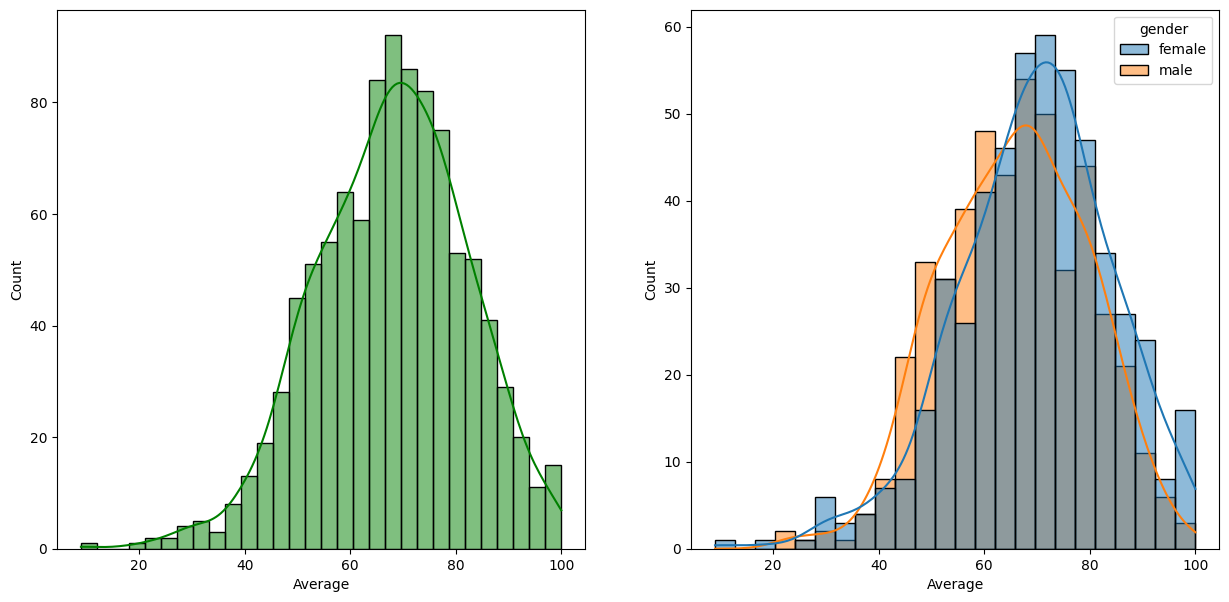

In [36]:
# with respect to Average Score

fig, axs=plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')
plt.show()

## Insights
##### -> Female students ted to perform well then male students

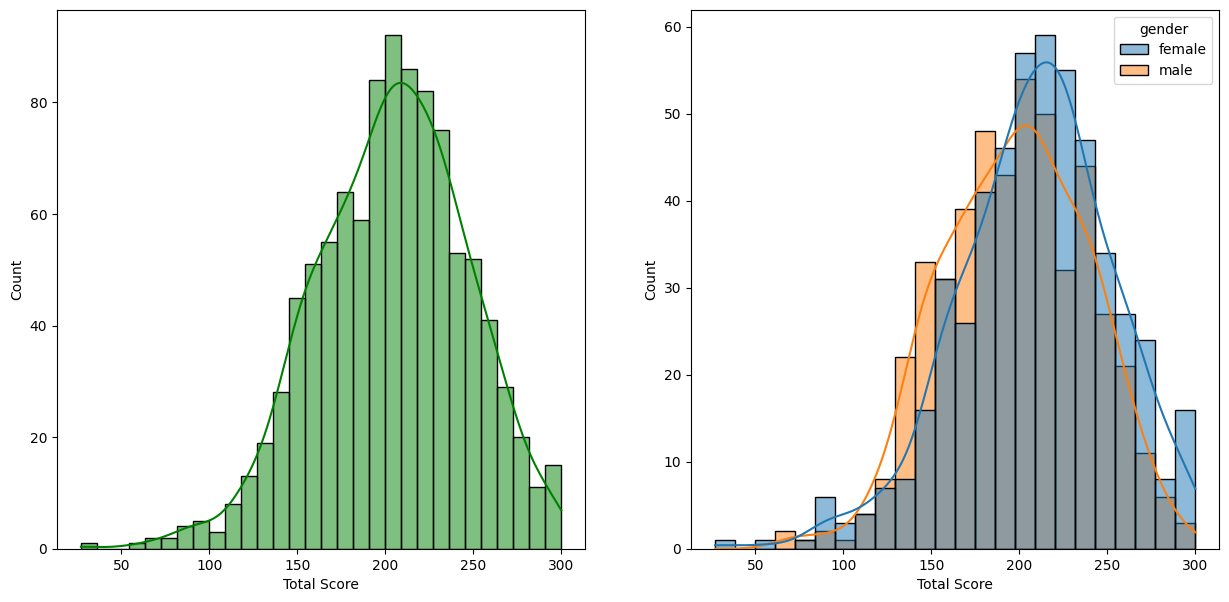

In [37]:
# Now with respect to Total Score
fig, axs=plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total Score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total Score', kde=True, hue='gender')
plt.show()

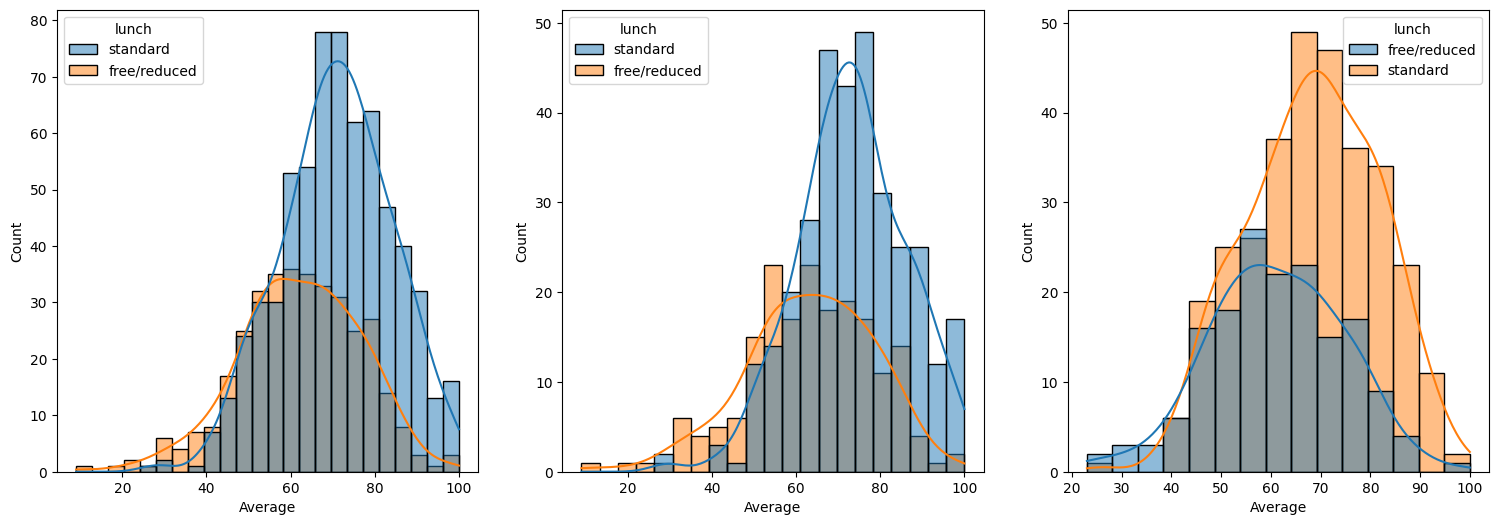

In [38]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='lunch')
plt.show()

## Insights
#### -> Standard lunch helps perform well in exams.
#### -> Standard lunch helps perform well in exams be it a male or female.

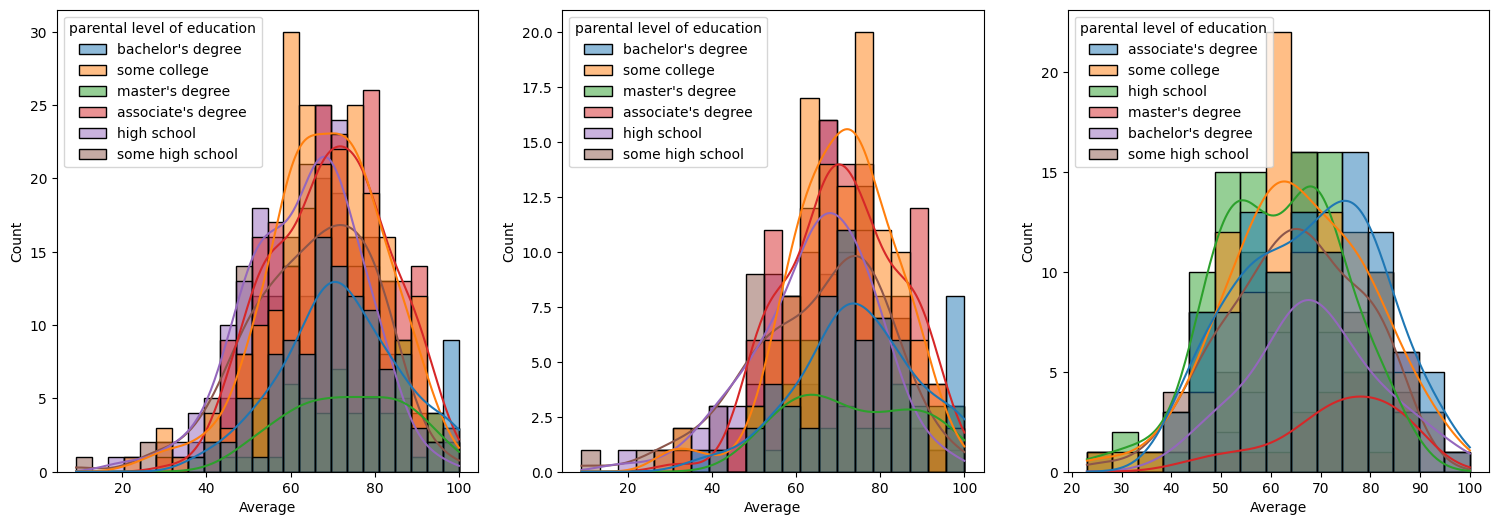

In [39]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='parental level of education')
plt.show()

### Insights
#### -> In general parent's education don't help student well in exam.
#### -> 2nd plot shows that parent's whose education is of associate's degree or master's degree thir male child tend perform well in exam
#### -> 3rd plot we can see there is no effect of parent's education on female students.

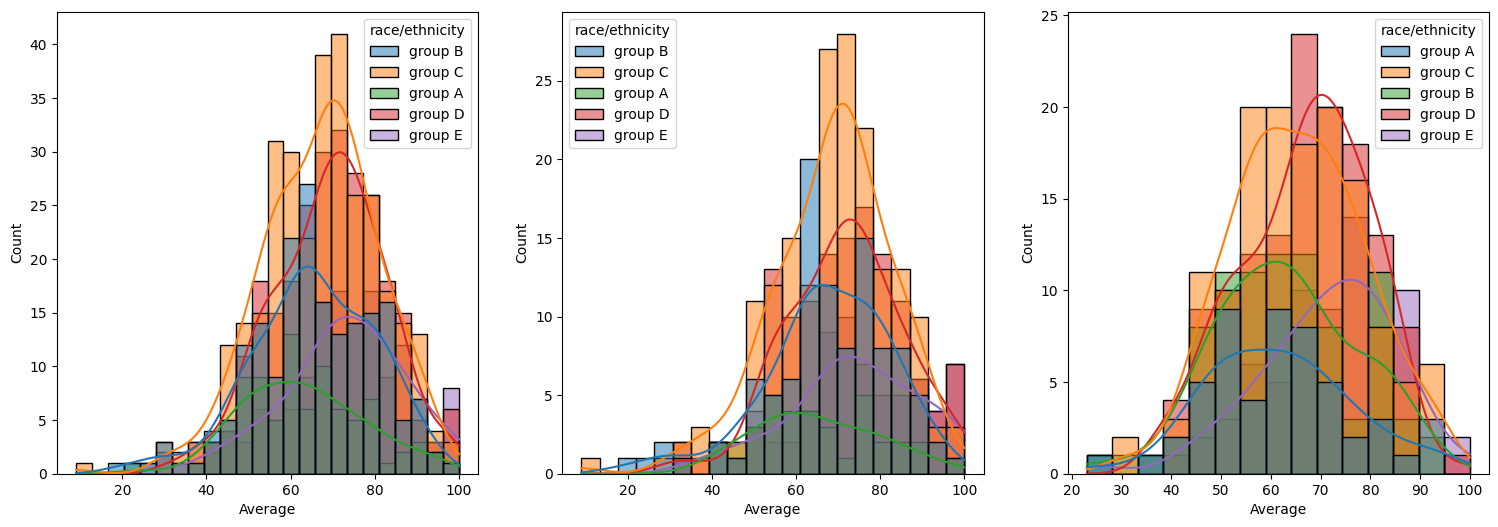

In [40]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='race/ethnicity')
plt.show()

## Insights
#### Students of group A and group B tends to perform poorly in exam irrespecctively of whether they are male or female.

## 4.2 Maximum Score of students in all three subjects

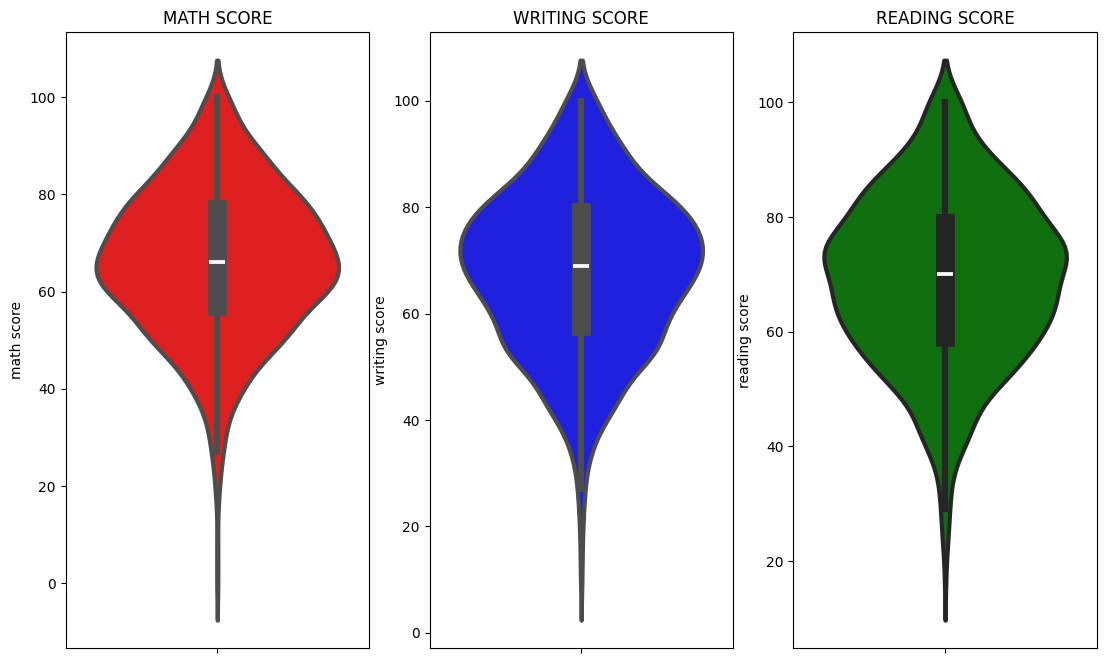

In [44]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1,)
plt.title("MATH SCORE")
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title("WRITING SCORE")
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
plt.subplot(1, 4, 3)
plt.title("READING SCORE")
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.show()

### Insights
##### From above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score 50-80

## 4.3 Multivariate analysis using pieplot

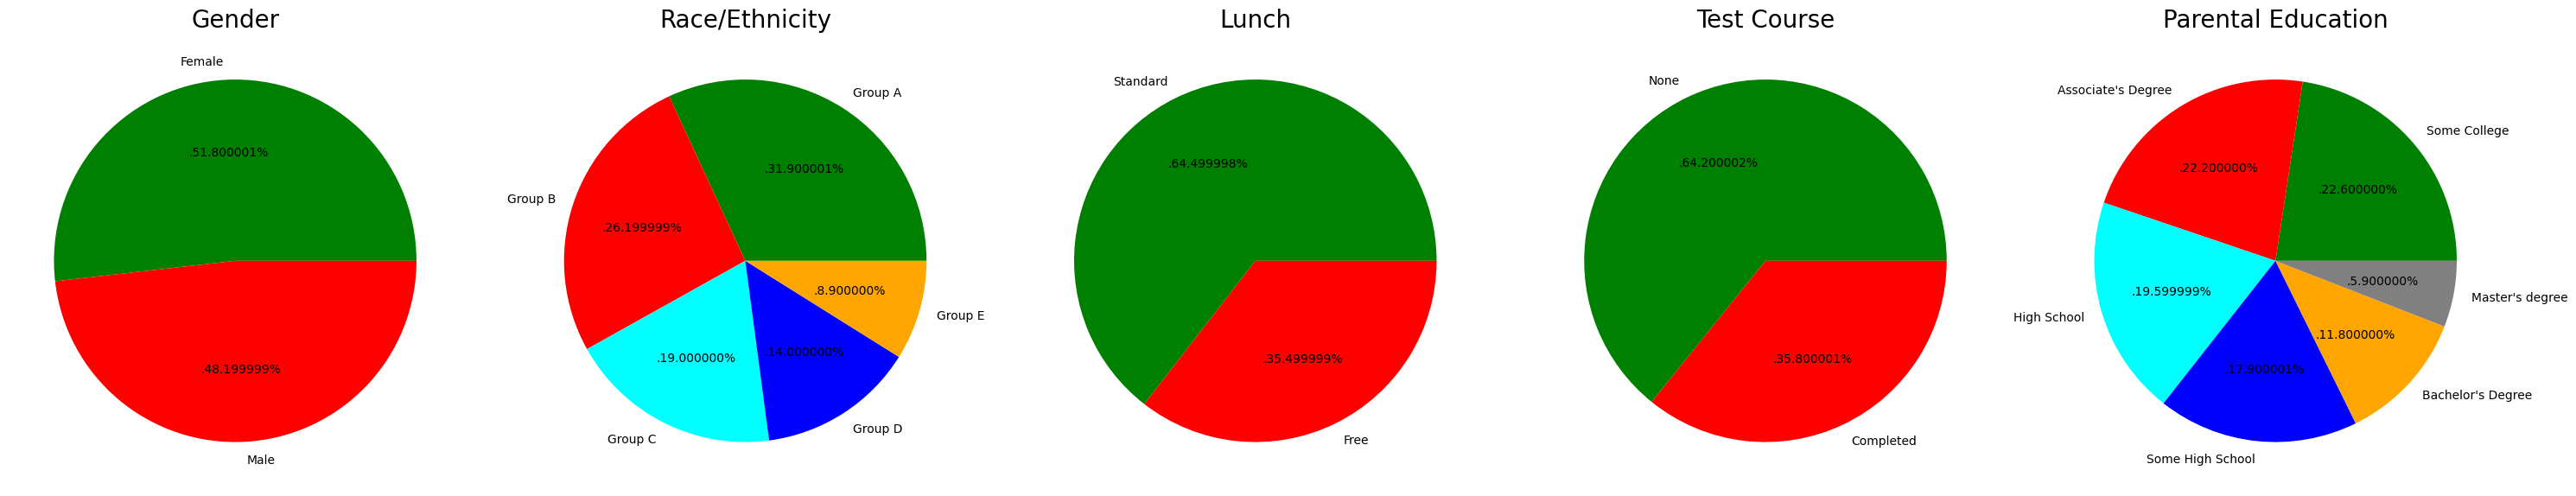

In [45]:
plt.rcParams['figure.figsize']=(30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['green', 'red']

plt.pie(size, colors=color, labels=labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
color = ['green', 'red', 'cyan', 'blue', 'orange']

plt.pie(size, labels=labels, colors=color, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
lables = 'Standard', 'Free'
color = ['green', 'red']

plt.pie(size, colors=color, labels=lables, autopct = '.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
lables = 'None', 'Completed'
color = ['green', 'red']

plt.pie(size, colors=color, labels=lables, autopct = '.%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
lables = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's degree"
color = ['green', 'red', 'cyan', 'blue', 'orange', 'grey']

plt.pie(size, colors=color, labels=lables, autopct = '.%2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


### Insights
##### -> Number of Male and Female students is almost equal
##### -> Number of students are greatest in Group C
##### -> Number of students who have standard lunch are greater
##### -> Number of students who have not enrolled in any test preparation course is greater
##### -> Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## 4.4 Feature Wise Visualization
### 4.4.1 GENDER COLUMN
##### -> How is distribution of Gender ?
##### -> Is Gender has any impact on students Performance ?

### UNIVARIATE ANALYSIS (How is distribution of Gender ?)

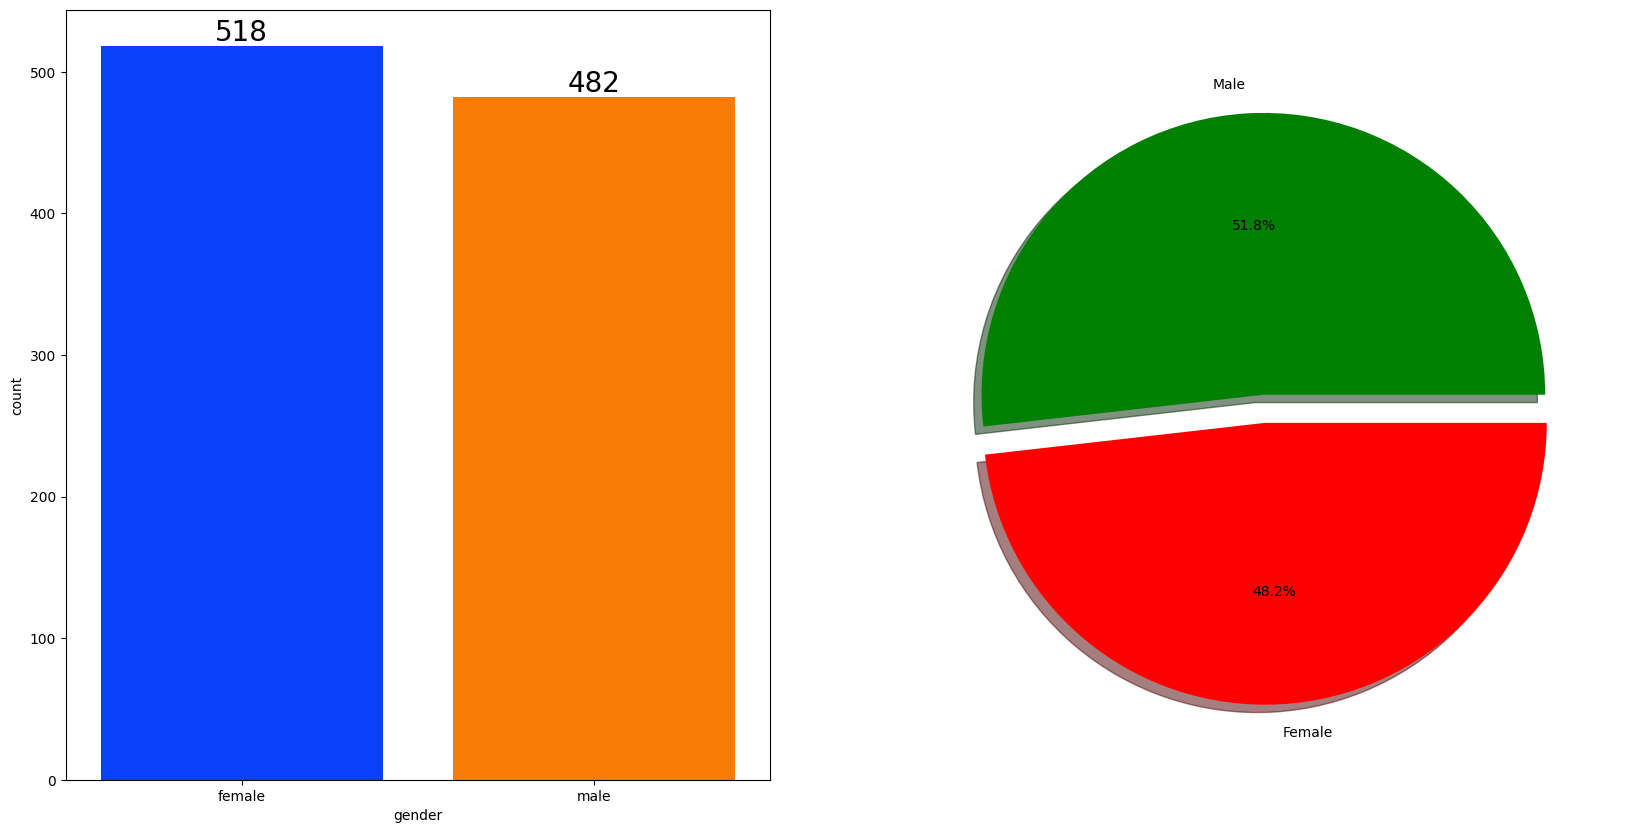

In [47]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black',size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1], autopct='%1.1f%%',shadow=True, colors=['green', 'red'])
plt.show()

### Insights
##### Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS (Is gender has any impact on students's performance ?)

In [51]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group


,math score,reading score,writing score,Total Score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


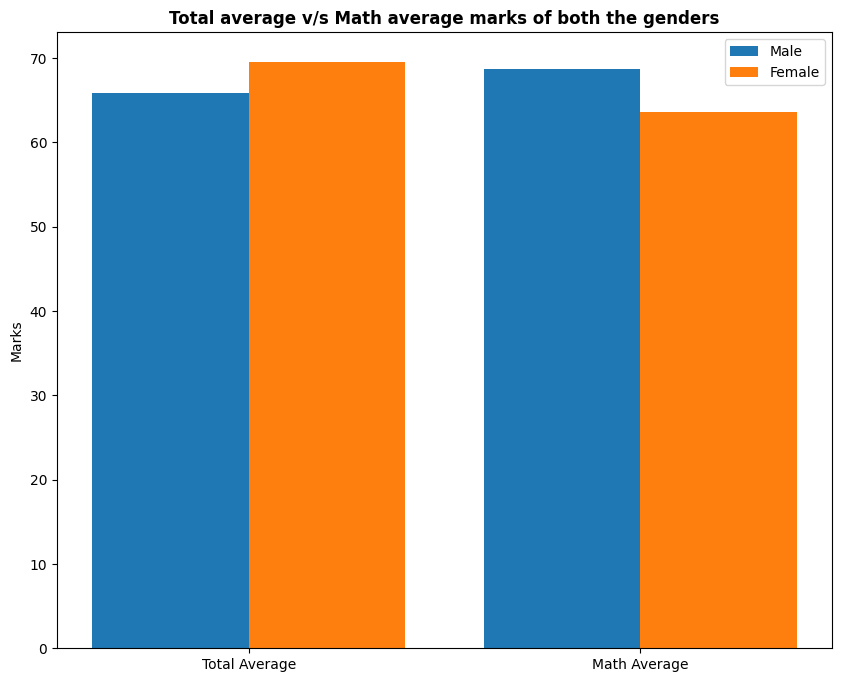

In [54]:
plt.figure(figsize=(10,8))

x = ['Total Average', 'Math Average']

female_scores = [gender_group['Average'][0],gender_group['math score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(x_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(x_axis, x)
plt.ylabel('Marks')
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

## Insights
##### On an average females have a better overall score than males.
##### On an math average Males have a better overall score than females.

## 4.4.2 RACE/ETHNICITY COLUMN
##### -> How is Group wise distribution ?
##### -> Is Race/ethnicity has any impact on student's performance ?

## UNIVARIATE ANALYSIS (How is Group wise distribution ?)

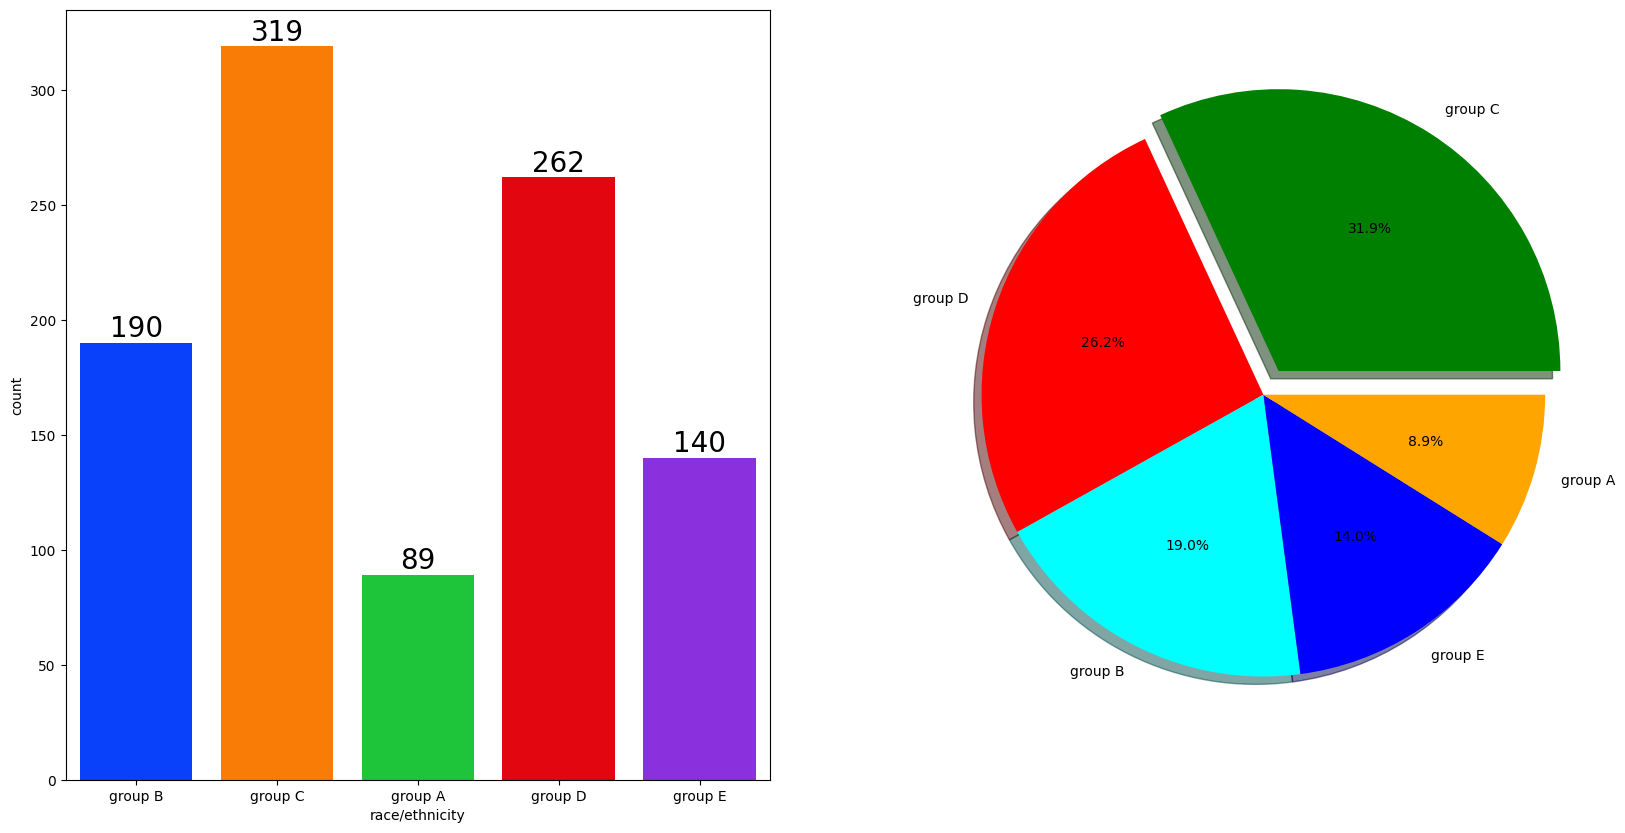

In [57]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race/ethnicity'], data=df, palette = 'bright', ax=ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x = df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=['green', 'red', 'cyan', 'blue', 'orange'])
plt.show()

## Insights
##### -> Most of the students belonging to Group C and Group D.
##### -> Lowest number of students belong to Group A.

### BIVARIATE ANALYSIS (Is Race/Ethnicity has any impact on student's performance ?)

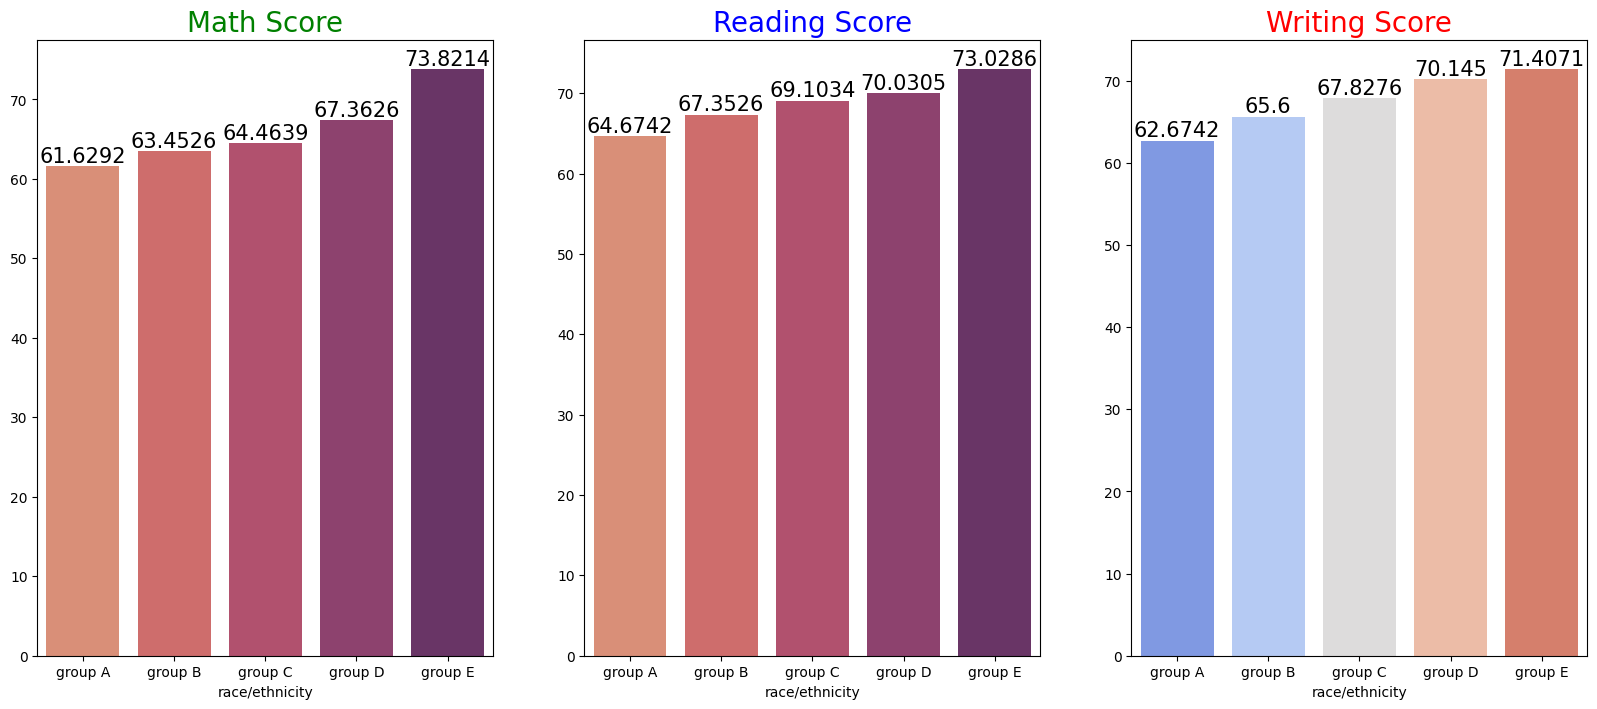

In [62]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1, 3, figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette='flare', ax=ax[0])
ax[0].set_title('Math Score', color='green', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='blue', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='red', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

## Insights 
##### -> Group E students have scored the highest marks.
##### -> Group A students have scored the lowest marks.
##### -> Students from a lower Socioeconomic status have a lower avg in all course subjects

## 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
##### -> What is educational background of student's parent ?.
##### -> Is parental education has any impact on student's performance ?

## UNIVARIATE ANALYSIS (What is educational background of student's parent ?)

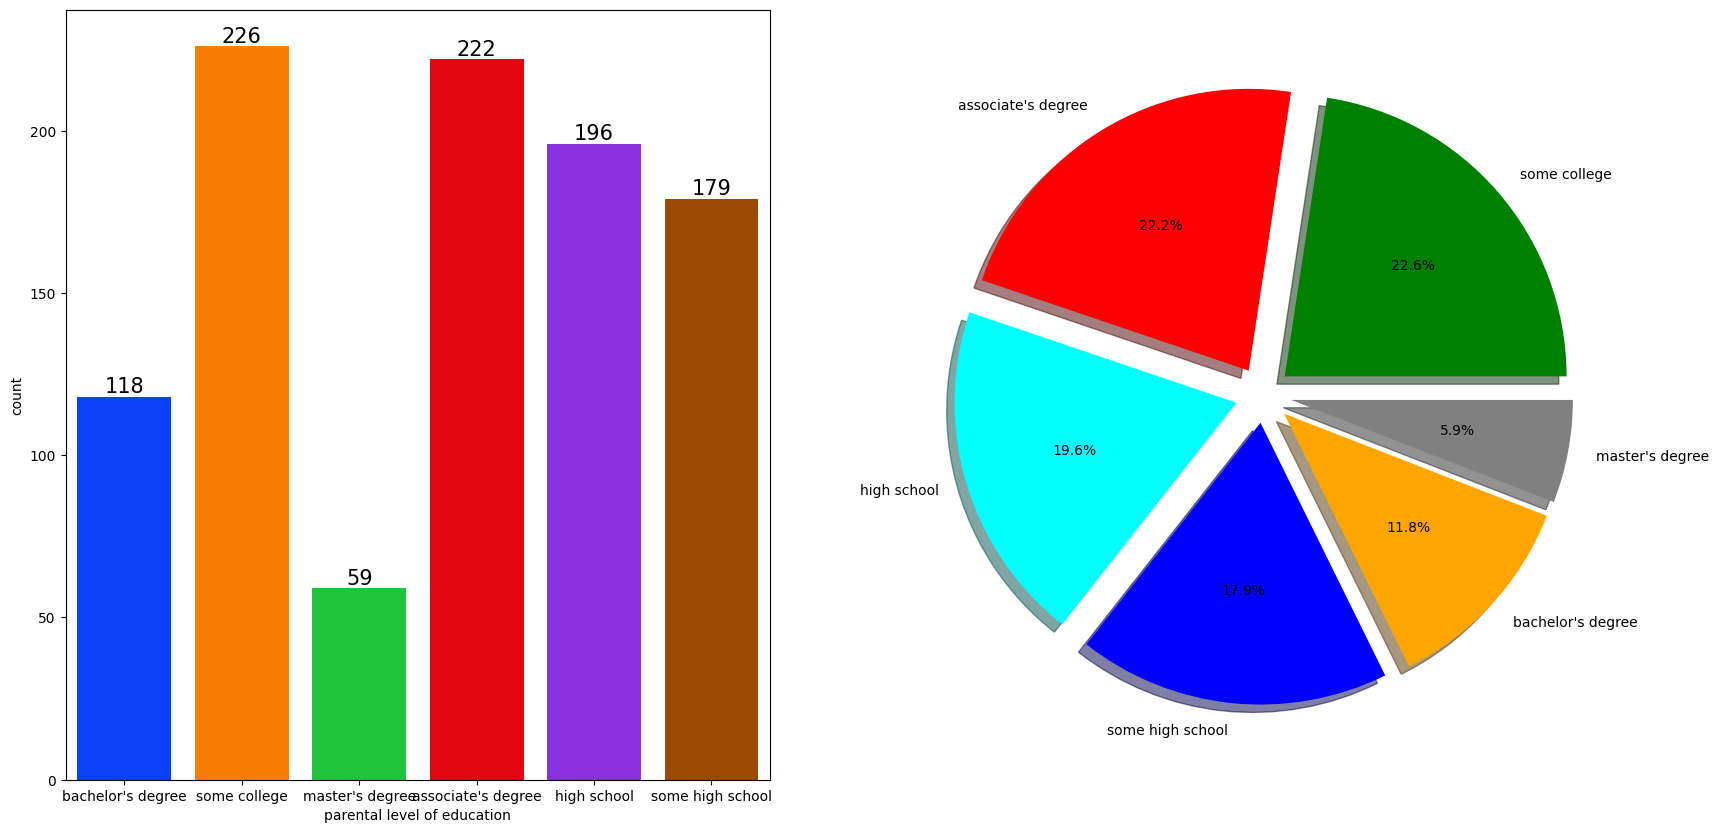

In [75]:
f,ax=plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['parental level of education'], data=df, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

plt.pie(x=df['parental level of education'].value_counts(), labels=df['parental level of education'].value_counts().index, autopct='%1.1f%%', shadow=True, colors=['green', 'red', 'cyan', 'blue', 'orange', 'grey'], explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
plt.show()

## Insights 
##### -> Largest number of parents are from some college.

## BIVARIATE ANALYSIS (Is Parental Education has any impact on student's performance ?)

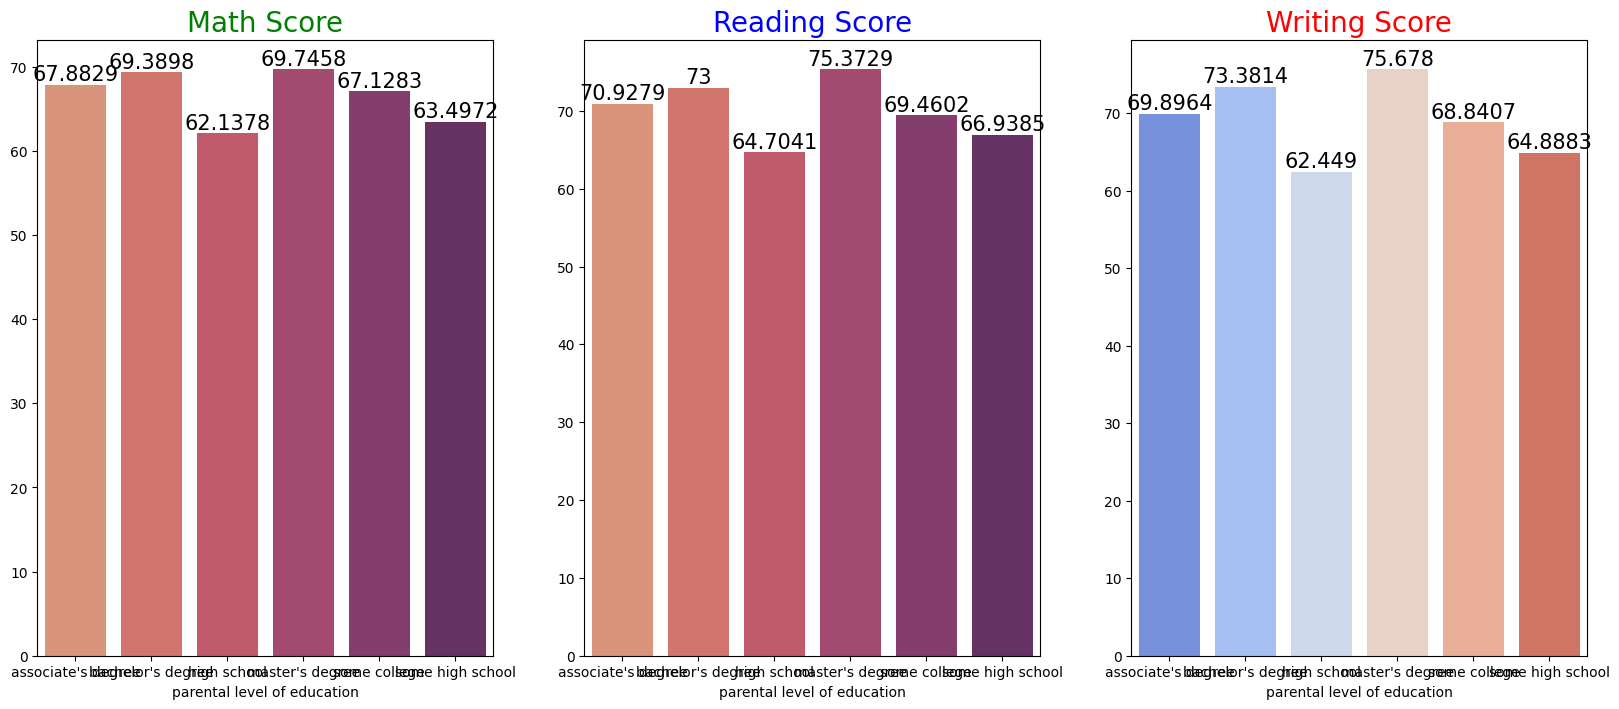

In [76]:
Group_data2=df.groupby('parental level of education')
f,ax=plt.subplots(1, 3, figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette='flare', ax=ax[0])
ax[0].set_title('Math Score', color='green', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='blue', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='red', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

## BIVARIATE ANALYSIS (Is Parental Education has any impact on student's performance ?)

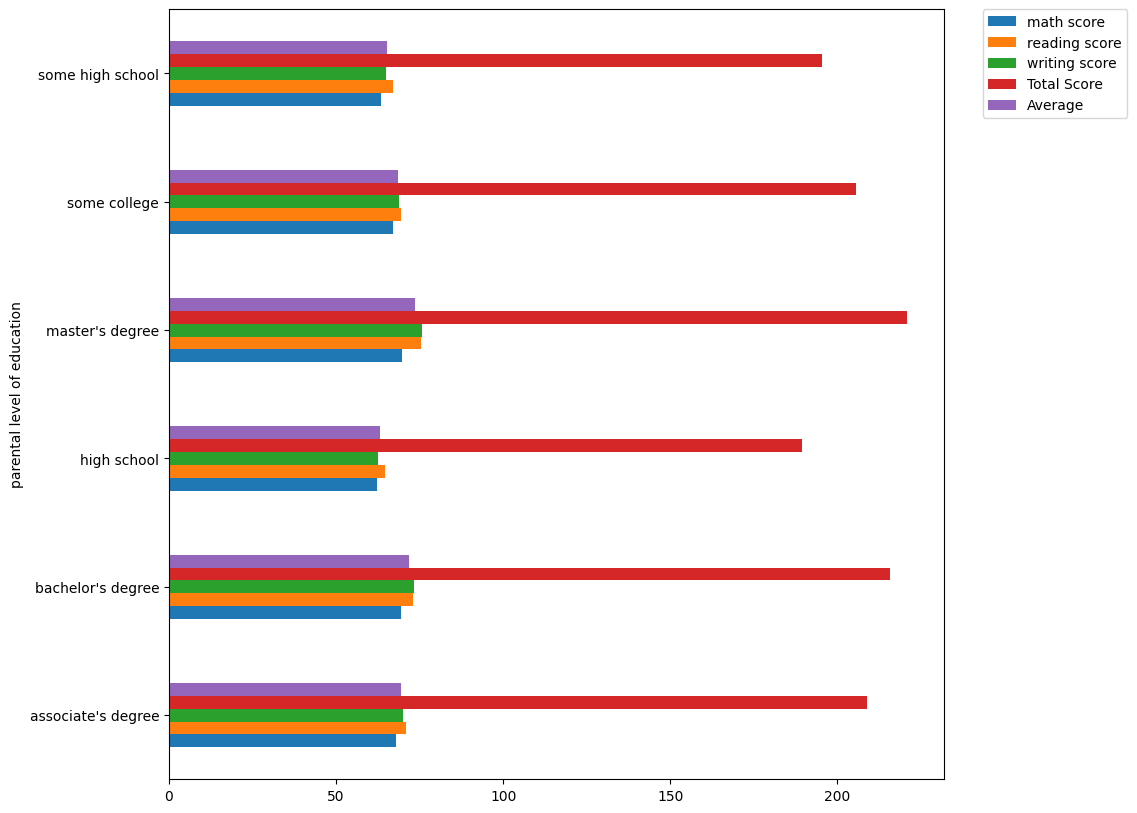

In [79]:
df.groupby('parental level of education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad = 0.)
plt.show()

## Insights 
##### -> The score of student whose parents possess master's degree and bachelor level education are high than other

## 4.4.4 LUNCH COLUMN
##### -> Which type of lunch is most common among students ?
##### -> What is the effect of lunch type on test results ?

## UNIVARIATE ANALYSIS (Which type of lunch is most common among students ?)

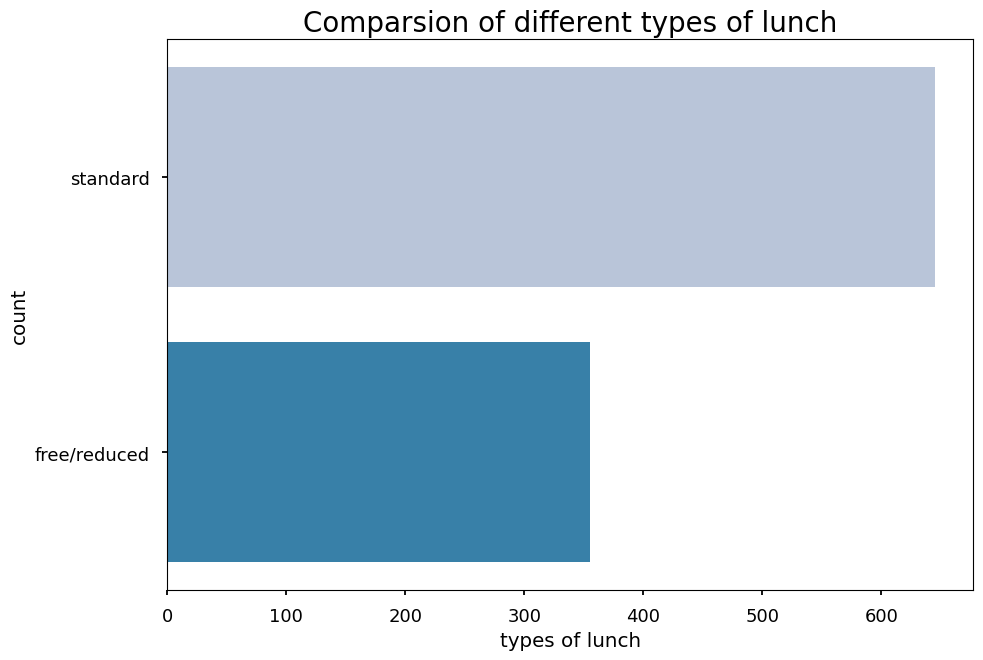

In [81]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette= 'PuBu')
plt.title('Comparsion of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

## Insights 
##### -> Students being served Standard Lunch than Free Lunch

## BIVARIATE ANALYSIS (What is the effect of lunch type on test results ?)

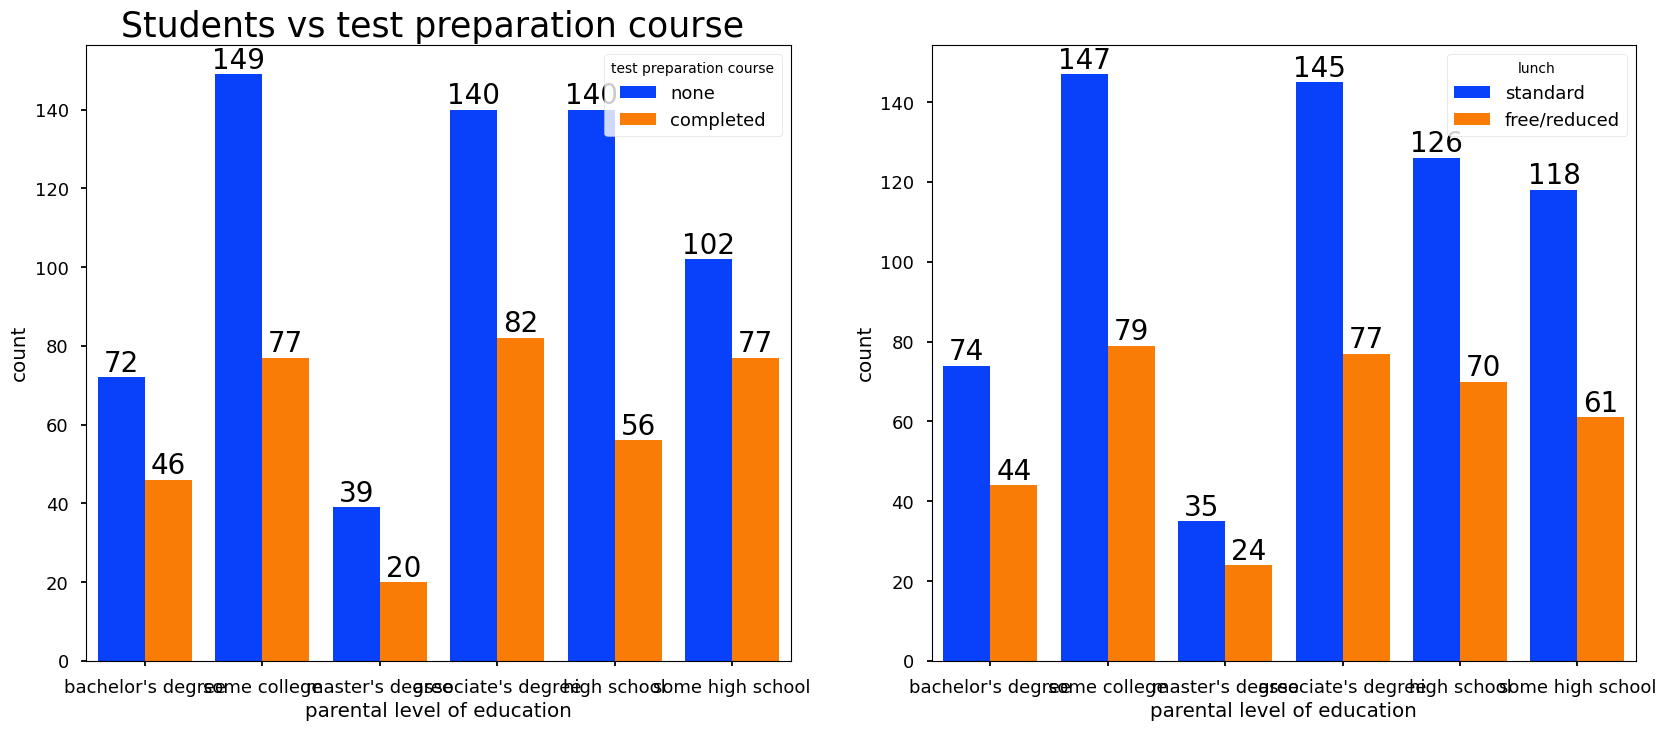

In [83]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x=df['parental level of education'], data=df, palette = 'bright', hue='test preparation course', saturation = 0.95, ax=ax[0])
ax[0].set_title('Students vs test preparation course ', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

sns.countplot(x=df['parental level of education'], data=df, palette = 'bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

## Insights 
##### -> Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

## 4.4.5 TEST PREPARATION COURSE COLUMN
##### -> Which type of lunch is most common among students ?
##### -> Is Test Preparation course has any impact on student's performance ?

## UNIVARIATE ANALYSIS (Which type of lunch is most common among students ?)

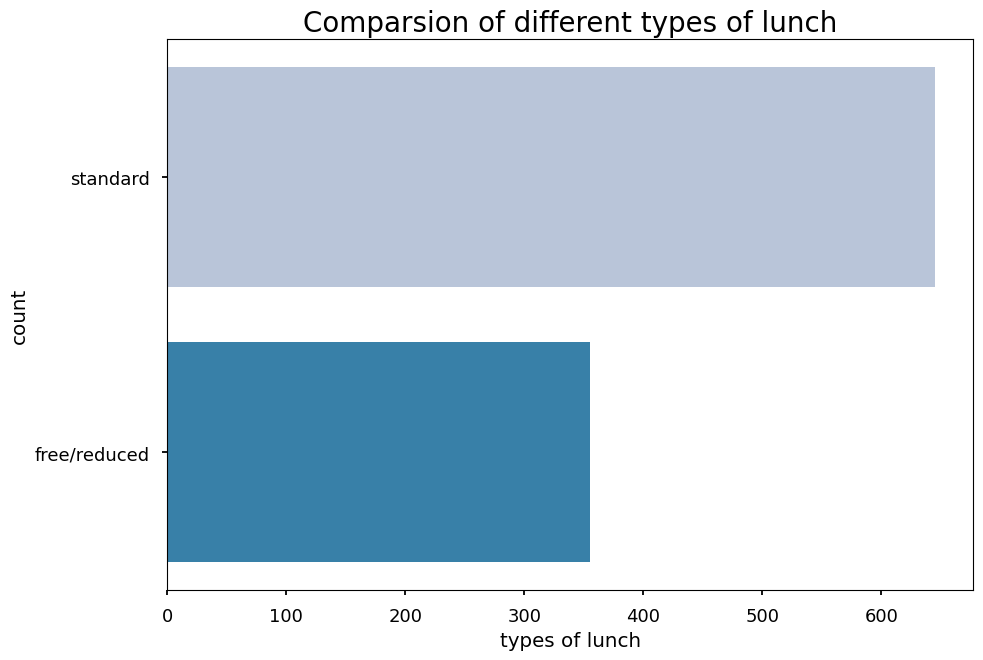

In [84]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette= 'PuBu')
plt.title('Comparsion of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

## BIVARIATE ANALYSIS (Is Test Preparation course has any impact on student's performance ?)

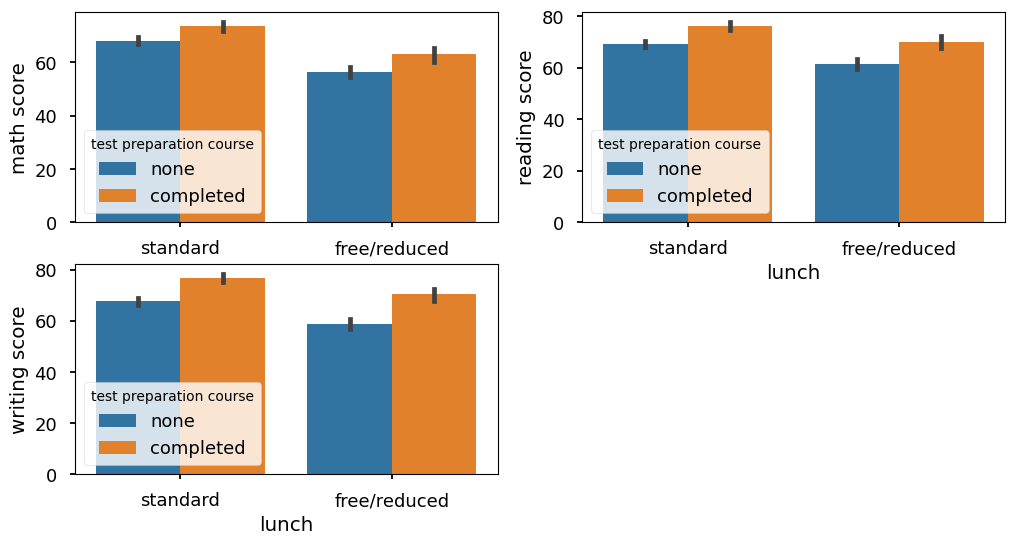

In [86]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.show()

## Insights
##### -> Students who have completed the Test Preaparation Course have scores higher in all three categories than those who haven't taken the course

## 4.4.6 CHECKING OUTLIERS

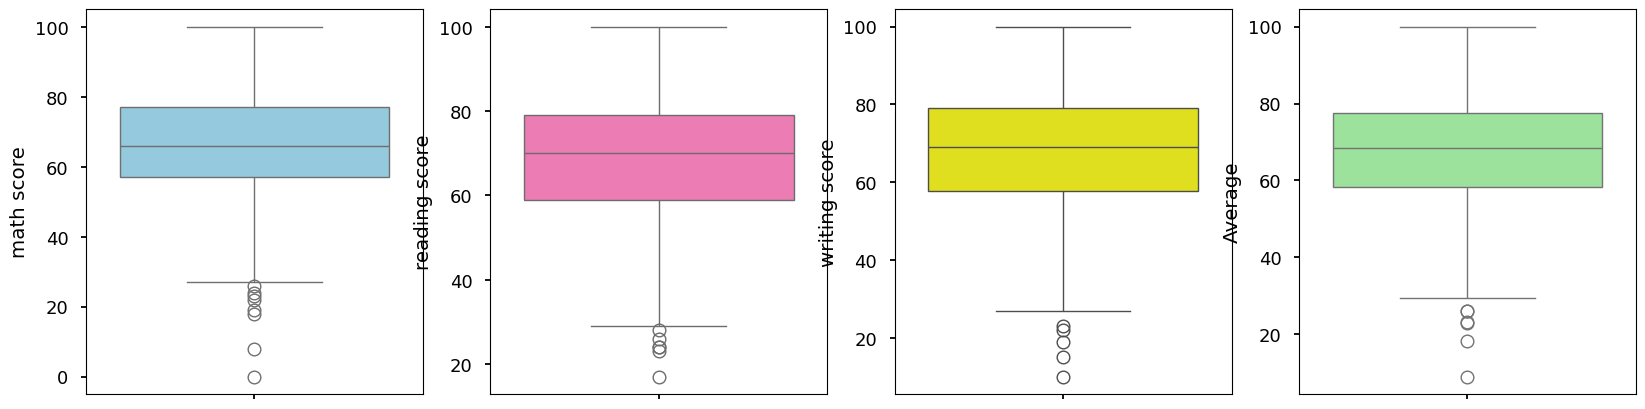

In [93]:
plt.subplots(1, 4, figsize=(20, 5))
plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'], color='lightgreen')
plt.show()

## 4.4.7 MULTIVARIATE ANALYSIS USING PAIRPLOT

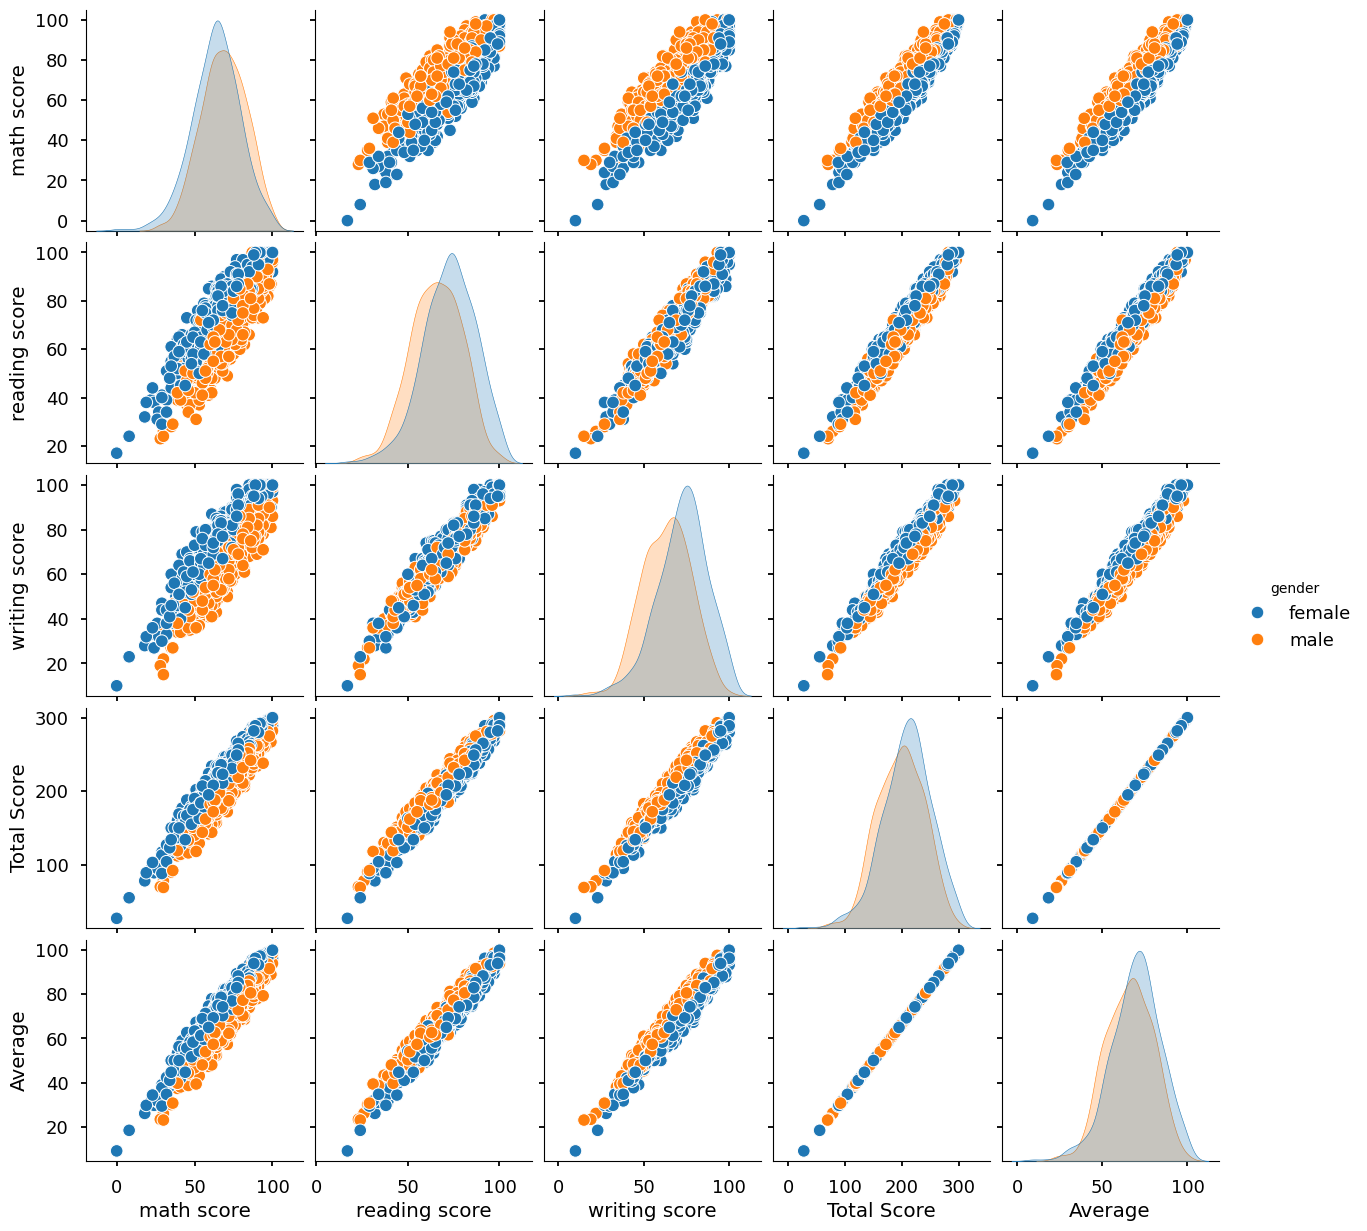

In [94]:
sns.pairplot(df, hue='gender')
plt.show()

## Insights 
##### -> From the above plot it is clear that all the scores increase linearly with each other

## 5. CONCLUSIONS
##### -> Student's Performance is related with lunch, race, parental level of education
##### -> Females lead in pass percentage and also are top-scores
##### -> Student's Performance is not much related with test preparation course
##### -> Finishing preparation course is benefitial.